,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Original training samples: 16512
Bootstrap dataset 1 created with 16512 samples
Bootstrap dataset 2 created with 16512 samples
Bootstrap dataset 3 created with 16512 samples
Model 1 trained. Coefficients (first 5): [ 0.446  0.01  -0.122  0.8   -0.   ]
Model 2 trained. Coefficients (first 5): [ 0.442  0.009 -0.112  0.755 -0.   ]
Model 3 trained. Coefficients (first 5): [ 0.446  0.009 -0.122  0.761  0.   ]
Model 1 prediction sample: [0.717 1.778 2.721 2.847 2.628]
Model 2 prediction sample: [0.718 1.778 2.682 2.865 2.629]
Model 3 prediction sample: [0.727 1.756 2.687 2.832 2.585]

=== Individual Model Scores ===
Model 1: R² = 0.5731, RMSE = 0.7479
Model 2: R² = 0.5742, RMSE = 0.7470
Model 3: R² = 0.5788, RMSE = 0.7429

=== Averaged Model Performance (Bagging Result) ===
R² = 0.5756, RMSE = 0.7458


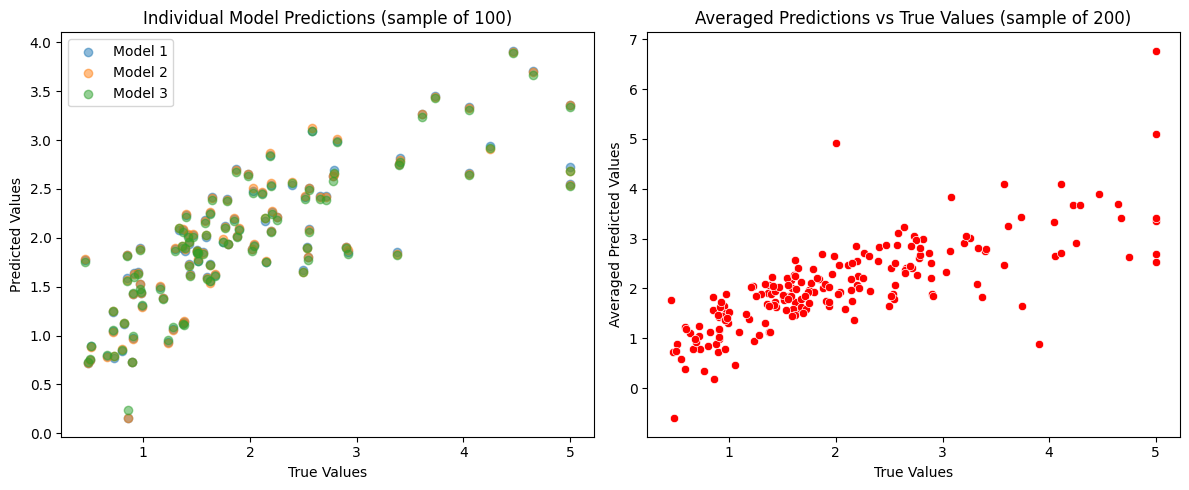

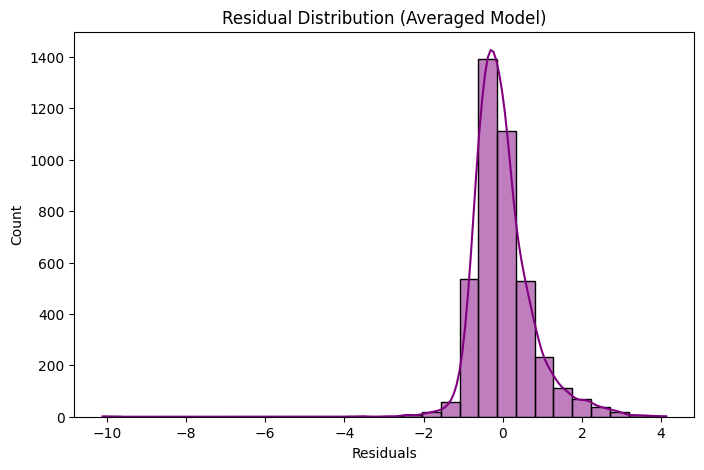


✅ All steps completed successfully!


In [1]:
# ====================================================
# BAGGING DEMONSTRATION WITH LINEAR REGRESSION
# ====================================================

# ✅ STEP 1: Imports
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting (Jupyter specific)
%matplotlib inline

# ====================================================
# STEP 2: Load Dataset
# ====================================================
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()
display(df.head())

# ====================================================
# STEP 3: Train-Test Split
# ====================================================
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Original training samples: {len(X_train)}")

# ====================================================
# STEP 4: Bootstrap Sampling (3 datasets)
# ====================================================
boot_datasets = []
n_bootstraps = 3
np.random.seed(42)

for i in range(n_bootstraps):
    sample_idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
    Xb = X_train.iloc[sample_idx].reset_index(drop=True)
    yb = y_train.iloc[sample_idx].reset_index(drop=True)
    boot_datasets.append((Xb, yb))
    print(f"Bootstrap dataset {i+1} created with {len(Xb)} samples")

# ====================================================
# STEP 5: Train Models on Each Bootstrap Dataset
# ====================================================
models = []
for i, (Xb, yb) in enumerate(boot_datasets):
    model = LinearRegression()
    model.fit(Xb, yb)
    models.append(model)
    print(f"Model {i+1} trained. Coefficients (first 5): {np.round(model.coef_[:5], 3)}")

# ====================================================
# STEP 6: Predict with Each Model on Test Set
# ====================================================
predictions = []
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    predictions.append(y_pred)
    print(f"Model {i+1} prediction sample: {np.round(y_pred[:5], 3)}")

# ====================================================
# STEP 7: Average Predictions (Bagging)
# ====================================================
y_pred_avg = np.mean(predictions, axis=0)

# ====================================================
# STEP 8: Evaluate Models
# ====================================================
print("\n=== Individual Model Scores ===")
for i, y_pred in enumerate(predictions):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Model {i+1}: R² = {r2:.4f}, RMSE = {rmse:.4f}")

r2_avg = r2_score(y_test, y_pred_avg)
rmse_avg = np.sqrt(mean_squared_error(y_test, y_pred_avg))
print("\n=== Averaged Model Performance (Bagging Result) ===")
print(f"R² = {r2_avg:.4f}, RMSE = {rmse_avg:.4f}")

# ====================================================
# STEP 9: Visualization
# ====================================================
plt.figure(figsize=(12, 5))

# Scatter plots for individual models
plt.subplot(1, 2, 1)
plt.title("Individual Model Predictions (sample of 100)")
for i, y_pred in enumerate(predictions):
    plt.scatter(y_test[:100], y_pred[:100], alpha=0.5, label=f"Model {i+1}")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()

# Averaged model plot
plt.subplot(1, 2, 2)
plt.title("Averaged Predictions vs True Values (sample of 200)")
sns.scatterplot(x=y_test[:200], y=y_pred_avg[:200], color='red')
plt.xlabel("True Values")
plt.ylabel("Averaged Predicted Values")

plt.tight_layout()
plt.show()

# Residual distribution
residuals = y_test - y_pred_avg
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color="purple", bins=30)
plt.title("Residual Distribution (Averaged Model)")
plt.xlabel("Residuals")
plt.show()

print("\n✅ All steps completed successfully!")
